<a href="https://colab.research.google.com/github/KailashPrajapati2303/19IT119-19IT120-IT253_Quiz-Game/blob/master/19IT119_19IT120_galaxy_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import cv2
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [56]:
!pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from astroNN.datasets import load_galaxy10

In [58]:
images, labels = load_galaxy10()
print(labels)
label = utils.to_categorical(labels, 10)

/root/.astroNN/datasets/Galaxy10.h5 was found!
[2 2 4 ... 2 9 2]


In [59]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [60]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [61]:
train_x, test_x = train_test_split(np.arange(labels.shape[0]), test_size = 0.1)
train_images, train_labels, test_images, test_labels = images[train_x], label[train_x], images[test_x], label[test_x]

In [62]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [63]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

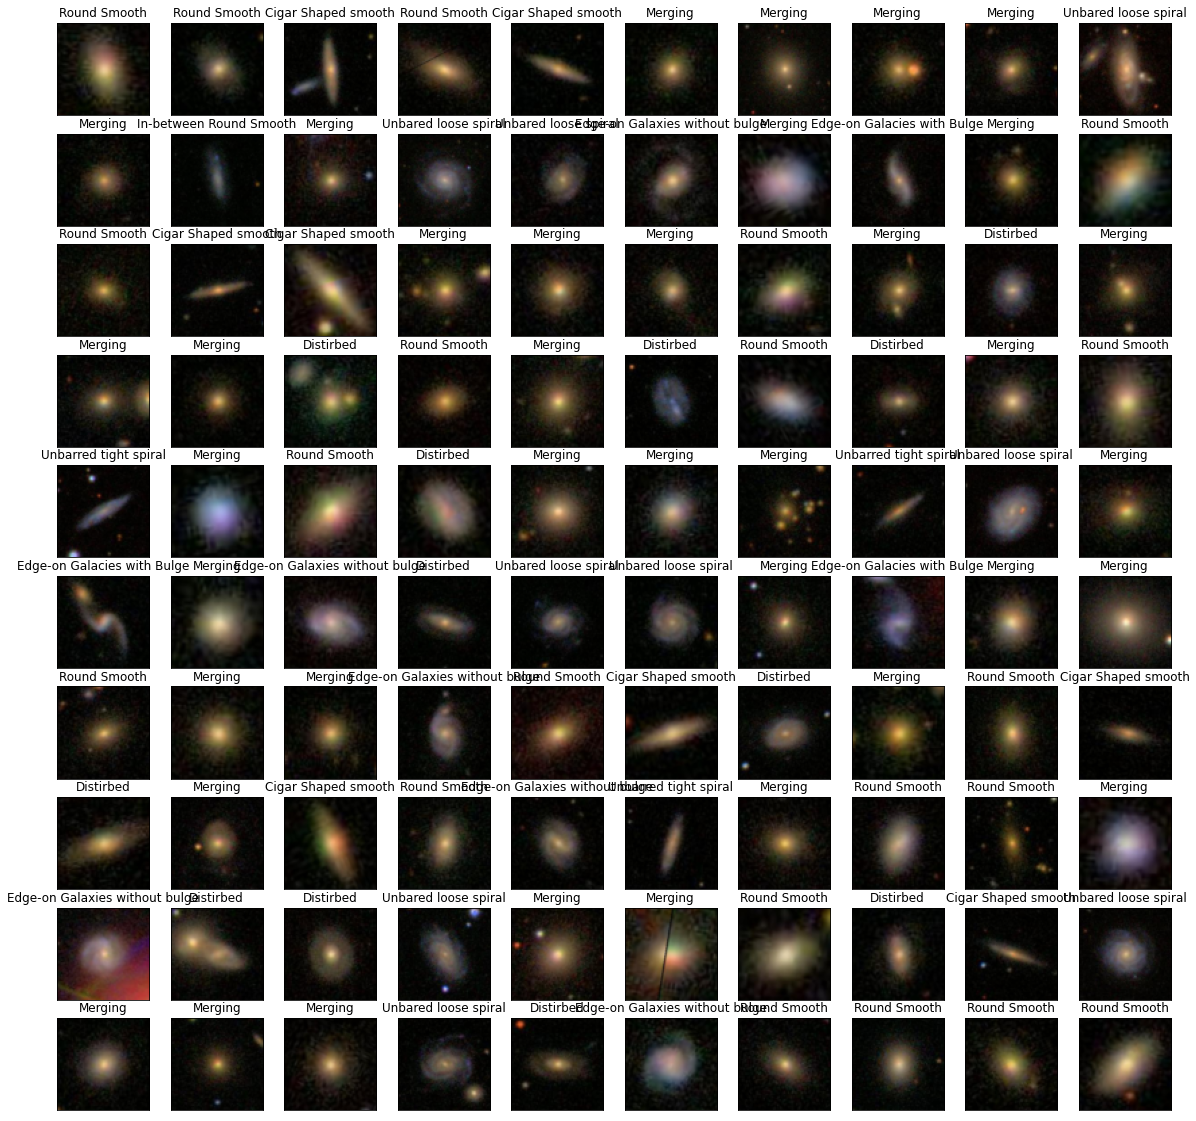

In [64]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


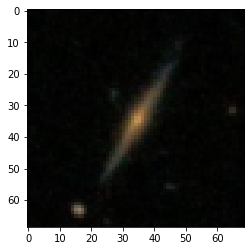

In [65]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [66]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

X_train  = X_train/255
X_test  = X_test/255

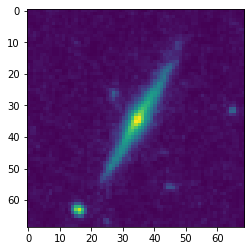

In [67]:
plt.imshow(X_train[0])

In [68]:
print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [69]:
print (X_train.shape)
print (train_labels.shape)
print (train_labels)

(19606, 69, 69, 1)
(19606, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [70]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             zoom_range=0.2,
                             horizontal_flip=True,)

datagen.fit(X_train)

datagen.fit(X_test)

In [75]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 69, 69, 16)        160       
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 17, 17, 32)       

In [76]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
batch_size=64
history = model.fit(X_train, train_labels, 
                    epochs=30, 
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , batch_size=32, validation_data=(X_test, test_labels), callbacks=[es])

Epoch 1/30
307/307 [==============================] - 88s 285ms/step - loss: 1.6600 - acc: 0.3671 - val_loss: 1.3351 - val_acc: 0.5016
Epoch 2/30
307/307 [==============================] - 80s 261ms/step - loss: 1.3069 - acc: 0.4964 - val_loss: 1.1327 - val_acc: 0.5957
Epoch 3/30
307/307 [==============================] - 83s 271ms/step - loss: 1.1285 - acc: 0.5855 - val_loss: 0.9603 - val_acc: 0.6677
Epoch 4/30
307/307 [==============================] - 82s 266ms/step - loss: 1.0423 - acc: 0.6197 - val_loss: 0.8872 - val_acc: 0.6687
Epoch 5/30
307/307 [==============================] - 79s 259ms/step - loss: 0.9356 - acc: 0.6575 - val_loss: 0.8362 - val_acc: 0.7008
Epoch 6/30
307/307 [==============================] - 81s 263ms/step - loss: 0.9145 - acc: 0.6675 - val_loss: 0.8048 - val_acc: 0.7168
Epoch 7/30
307/307 [==============================] - 79s 258ms/step - loss: 0.8776 - acc: 0.6798 - val_loss: 0.8022 - val_acc: 0.7072
Epoch 8/30
307/307 [==============================] - 8

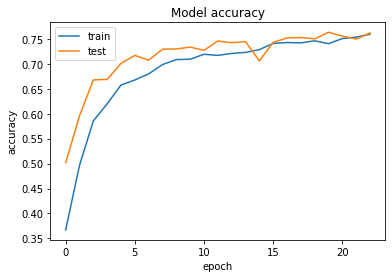

In [81]:
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

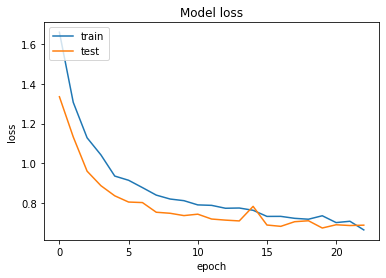

In [82]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()